In [1]:
import pandas as pd
import numpy as np
import os


pd.set_option("display.max_columns", None)

In [2]:
df_ = pd.read_excel("Survei Penggunaan OS dan FOSS.xlsx")

In [3]:
df = df_.copy()
df.head()

,Timestamp,0-1. Berapa usia Anda saat ini? (dalam tahun),0-2. Apa pekerjaan Anda saat ini?,0-3. Domisili (Provinsi),1. Sistem Operasi komputer mana saja yang Anda pernah dengar / ketahui?,2. Sistem Operasi apa saja yang Anda pernah pakai di komputer?,3. Sistem Operasi apa yang Anda pakai saat ini di komputer?,4. Sistem Operasi apa yang ingin Anda pakai sebagai OS utama di komputer?,"5. Menurut Anda, siapa saja yang cocok menggunakan sistem operasi MacOS?","6. Menurut Anda, siapa saja yang cocok menggunakan sistem operasi Windows?","7. Menurut Anda, siapa saja yang cocok menggunakan sistem operasi Linux?",8. Linux merupakan sistem oprasi yang berkembang dari ranah Open Source. Apakah Anda sebelumnya sudah tahu hal tersebut?,"9. Tidak seperti Windows atau MacOS, Linux memiliki berbagai pilihan varian sehingga penguna bisa memilih mana yang sesuai dengan spesifikasi komputernya. Apakah sebelumnya Anda sudah tahu hal tersebut?",10. Apakah Anda pernah menggunakan sistem operasi Linux?,11. Apakah Anda tertarik untuk mencoba sistem operasi Linux?,12. Mengapa Anda memilih jawaban tersebut (jawaban pertanyaan 11) ?,13. Darimanakah Anda tahu istilah Free & Open Source Software (FOSS) pertama kali?,"14. Menurut Anda, apakah yang dimaksud ""Free"" pada istilah FOSS?",15-1. Aplikasi yang masuk dalam kategori FOSS bisa gratis maupun berbayar. Manakah yang Anda prioritaskan untuk dipakai?,15-2. Apa alasan Anda memilih jawaban tersebut?,16. Menggunakan aplikasi berlabel Free & Open Source Software lebih aman dari virus dibandingkan aplikasi bajakan,"17. Aplikasi berlabel Free & Open Source Software kurang populer dibandingkan aplikasi lainnya (semi berbayar, berbayar)",18. Kebanyakan aplikasi berlabel Free & Open Source Software memiliki fitur yang kurang lengkap dibandingkan dengan aplikasi semi berbayar atau berbayar yang sejenis (memiliki fungsi yang sama),"19. Dari software Office berikut, mana saja yang pernah Anda gunakan di perangkat komputer? (lewati pertanyaan jika tidak pernah memakai Office)","20. Dari software Video Editor berikut, mana saja yang pernah Anda gunakan di perangkat komputer? (lewati pertanyaan jika tidak pernah memakai Video Editor)","21. Dari software Graphics Editor berikut, mana saja yang pernah Anda gunakan di perangkat komputer? (lewati pertanyaan jika tidak pernah memakai Graphics Editor)",22. Aplikasi FOSS lain apa saja yang pernah Anda pakai? (lewati pertanyaan jika tidak ada),"23. ""Saya tertarik untuk mencoba dan mengeksplor lebih lanjut tentang FOSS"""
0,2021-10-05 17:21:17.920,23,Karyawan swasta,Jawa Tengah,"MacOS (Apple), Linux, Windows, Chrome OS",Windows,Windows,Windows,"Pegawai kantor biasa, Pelajar, Pekerja kreatif...","Programmer, Pegawai kantor biasa, Pelajar, Pek...","Programmer, Pelajar",Ya,Ya,Tidak,Tidak,Karena sudah merasa nyaman menggunakan windows...,Sekolah,Gratis,Tidak berbayar,Karena biasanya biaya software mahal,Setuju,Setuju,Sama saja,"WPS Office, Microsoft Office, Google Office Su...",NaN,"Adobe Photoshop, CorelDraw, Paint","PSPP, R, Python",Ya
1,2021-10-05 17:21:20.008,59,Dosen,D.I. Yogyakarta,"Android, MacOS (Apple), Linux, Windows, Chrome OS","Android, MacOS (Apple), Linux, Windows",Linux,Linux,"Pegawai kantor biasa, Umum","Pegawai kantor biasa, Pelajar, Pekerja kreatif...","Programmer, Pegawai kantor biasa, Pelajar, Pek...",Ya,Ya,Ya,NaN,NaN,"Internet (website, blog)",Bebas,Tidak berbayar,"Jika yang gratis ada, dan mencukupi kebutuhan,...",Setuju,Setuju,Sama saja,"WPS Office, LibreOffice, Microsoft Office, Goo...",Kdenlive,"GIMP, CorelDraw, Inkscape, Krita, Paint",Octave,Ya
2,2021-10-05 17:23:34.482,24,Lainnya,D.I. Yogyakarta,"Android, MacOS (Apple), Linux, Windows, Chrome OS","Android, MacOS (Apple), Linux, Windows","Android, Linux, Windows",Linux,"Programmer, Pegawai kantor biasa, Pekerja krea...","Programmer, Pegawai kantor biasa, Pelajar, Pek...","Programmer, Pegawai kantor biasa, Pelajar, Pek...",Ya,Ya,Ya,NaN,NaN,"Internet (website, blog)",Bebas,Tidak berbayar,"Lebih hemat tentu

# renaming columns & changing id

In [4]:
new_columns = ['id','usia','pekerjaan','domisili',
               'tahu_os','pernah_pakai_os','sedang_pakai_os','ingin_utama_os', 'cocok_macos',
               'cocok_windows','cocok_linux','linux_tahu_open_source','linux_varian_spek','linux_pernah_pakai',
               'linux_tertarik','linux_alasan_tertarik','foss_tahu_darimana','foss_free','foss_prioritas','foss_alasan_prioritas',
               'foss_aman_virus','foss_kurang_pop','foss_fitur_kurang','foss_office','foss_video_editor',
               'foss_grafik_editor','foss_lainnya','foss_tertarik'
              ]

In [5]:
old_columns = df.columns.to_list()
dict_columns = dict(zip(new_columns, old_columns))

dict_columns

{'id': 'Timestamp',
 'usia': '0-1. Berapa usia Anda saat ini? (dalam tahun)',
 'pekerjaan': '0-2. Apa pekerjaan Anda saat ini?',
 'domisili': '0-3. Domisili (Provinsi)',
 'tahu_os': '1. Sistem Operasi komputer mana saja yang Anda pernah dengar / ketahui?',
 'pernah_pakai_os': '2. Sistem Operasi apa saja yang Anda pernah pakai di komputer?',
 'sedang_pakai_os': '3. Sistem Operasi apa yang Anda pakai saat ini di komputer?',
 'ingin_utama_os': '4. Sistem Operasi apa yang ingin Anda pakai sebagai OS utama di komputer?',
 'cocok_macos': '5. Menurut Anda, siapa saja yang cocok menggunakan sistem operasi MacOS?',
 'cocok_windows': '6. Menurut Anda, siapa saja yang cocok menggunakan sistem operasi Windows?',
 'cocok_linux': '7. Menurut Anda, siapa saja yang cocok menggunakan sistem operasi Linux?',
 'linux_tahu_open_source': '8. Linux merupakan sistem oprasi yang berkembang dari ranah Open Source. Apakah Anda sebelumnya sudah tahu hal tersebut?',
 'linux_varian_spek': '9. Tidak seperti Windows

In [6]:
df_new = df.copy()
df_new.columns = new_columns
df_new['id'] = np.arange(1, len(df_new)+1)

df_new.head()

,id,usia,pekerjaan,domisili,tahu_os,pernah_pakai_os,sedang_pakai_os,ingin_utama_os,cocok_macos,cocok_windows,cocok_linux,linux_tahu_open_source,linux_varian_spek,linux_pernah_pakai,linux_tertarik,linux_alasan_tertarik,foss_tahu_darimana,foss_free,foss_prioritas,foss_alasan_prioritas,foss_aman_virus,foss_kurang_pop,foss_fitur_kurang,foss_office,foss_video_editor,foss_grafik_editor,foss_lainnya,foss_tertarik
0,1,23,Karyawan swasta,Jawa Tengah,"MacOS (Apple), Linux, Windows, Chrome OS",Windows,Windows,Windows,"Pegawai kantor biasa, Pelajar, Pekerja kreatif...","Programmer, Pegawai kantor biasa, Pelajar, Pek...","Programmer, Pelajar",Ya,Ya,Tidak,Tidak,Karena sudah merasa nyaman menggunakan windows...,Sekolah,Gratis,Tidak berbayar,Karena biasanya biaya software mahal,Setuju,Setuju,Sama saja,"WPS Office, Microsoft Office, Google Office Su...",NaN,"Adobe Photoshop, CorelDraw, Paint","PSPP, R, Python",Ya
1,2,59,Dosen,D.I. Yogyakarta,"Android, MacOS (Apple), Linux, Windows, Chrome OS","Android, MacOS (Apple), Linux, Windows",Linux,Linux,"Pegawai kantor biasa, Umum","Pegawai kantor biasa, Pelajar, Pekerja kreatif...","Programmer, Pegawai kantor biasa, Pelajar, Pek...",Ya,Ya,Ya,NaN,NaN,"Internet (website, blog)",Bebas,Tidak berbayar,"Jika yang gratis ada, dan mencukupi kebutuhan,...",Setuju,Setuju,Sama saja,"WPS Office, LibreOffice, Microsoft Office, Goo...",Kdenlive,"GIMP, CorelDraw, Inkscape, Krita, Paint",Octave,Ya
2,3,24,Lainnya,D.I. Yogyakarta,"Android, MacOS (Apple), Linux, Windows, Chrome OS","Android, MacOS (Apple), Linux, Windows","Android, Linux, Windows",Linux,"Programmer, Pegawai kantor biasa, Pekerja krea...","Programmer, Pegawai kantor biasa, Pelajar, Pek...","Programmer, Pegawai kantor biasa, Pelajar, Pek...",Ya,Ya,Ya,NaN,NaN,"Internet (website, blog)",Bebas,Tidak berbayar,"Lebih hemat tentunya, misalnya ada donasi bisa...",Tidak setuju,Sama saja,Tidak setuju,"WPS Office, LibreOffice, Microsoft Office, Goo...","Adobe Premiere, Obs","GIMP, Adobe Photoshop, CorelDraw, Paint",Git,Ya
3,4,23,Pegawai negeri,D.I. Yogyakarta,"Android, MacOS (Apple), Linux, Windows","Android, Windows","Android, Windows",Windows,Pekerja kreatif (editor),Pegawai kantor biasa,Umum,Tidak,Ya,Tidak,Ya,Karena penasaran dengan tampilan dan fitur-fit...,Orang lain (teman atau keuarga),Gratis,Berbayar,Fitur lebih lengkap,Sama saja,Tidak setuju,Setuju,"WPS Office, Microsoft Office, Google Office Su...","Sony Vegas, Adobe Premiere","Adobe Photoshop, CorelDraw, Paint","Filmora, Blender",Ya
4,5,26,Admin,D.I. Yogyakarta,Windows,Windows,Windows,Windows,"Programmer, Pegawai kantor biasa, Pelajar, Pek...",Umum,Programmer,Ya,Ya,Tidak,Ya,"Karena tertarik, tapi belum sempat untuk mempe...",Survei ini,Gratis,Tidak berbayar,Belum punya budget buat yang berbayar,Sama saja,Sama saja,Sama saja,"WPS Office, Microsoft Office",NaN,"Adobe Photoshop, CorelDraw, Inkscape, Paint",NaN,Ya


# Cleaning

In [7]:
df_analisis = df_new.copy()

df_analisis['foss_office'] = df_analisis['foss_office'].str.replace("Google Office Suit (docs, spreadsheet, presentation)",
                                                                    "Google Office Suit", regex=False)

df_analisis['foss_video_editor'] = df_analisis['foss_video_editor'].str.title()
df_analisis['foss_video_editor'] = df_analisis['foss_video_editor'].str.replace("Obs", "OBS Studio", regex=False)
df_analisis['foss_video_editor'] = df_analisis['foss_video_editor'].str.replace("Wondeshare Filmora", "Filmora", regex=False)
df_analisis['foss_video_editor'] = df_analisis['foss_video_editor'].str.replace("Wondershare Filmora", "Filmora", regex=False)
df_analisis['foss_video_editor'] = df_analisis['foss_video_editor'].str.replace("Filmora", "Wondershare Filmora", regex=False)
df_analisis['foss_video_editor'] = df_analisis['foss_video_editor'].str.replace("Sony Vegas", "Vegas", regex=False)
df_analisis['foss_video_editor'] = df_analisis['foss_video_editor'].str.replace("Vegas", "Sony Vegas", regex=False)
df_analisis['foss_video_editor'] = df_analisis['foss_video_editor'].str.replace("Videopad", "VideoPad", regex=False)
df_analisis['foss_video_editor'] = df_analisis['foss_video_editor'].str.replace("Vsdc", "VSDC", regex=False)
df_analisis['foss_video_editor'] = df_analisis['foss_video_editor'].str.replace("Loght", "Light", regex=True)

df_analisis['foss_grafik_editor'] = df_analisis['foss_grafik_editor'].str.replace("blender", "Blender", regex=False)
df_analisis['foss_grafik_editor'] = df_analisis['foss_grafik_editor'].str.replace("dialux evo", "DIALux Evo", regex=False)
df_analisis['foss_grafik_editor'] = df_analisis['foss_grafik_editor'].str.replace("dialux evo", "DIALux Evo", regex=False)
df_analisis['foss_grafik_editor'] = df_analisis['foss_grafik_editor'].str.replace("sketch up", "SketchUp", regex=False)
df_analisis['foss_grafik_editor'] = df_analisis['foss_grafik_editor'].str.replace("sketchup", "SketchUp", regex=False)

df_analisis['foss_lainnya'] = df_analisis['foss_lainnya'].str.replace("FLC", "VLC", regex=False)
df_analisis['foss_lainnya'] = df_analisis['foss_lainnya'].str.replace(" rufus ", ", Rufus", regex=False)


In [8]:
kolom_multirespon = ['tahu_os', 'pernah_pakai_os', 'sedang_pakai_os', 'cocok_macos', 'cocok_windows',
                    'cocok_linux', 'foss_office','foss_video_editor',
                    'foss_grafik_editor', 'foss_lainnya']

for klm in kolom_multirespon:
    id_kolom = df_analisis.columns.to_list().index(klm)
    
    temp = df_analisis[klm].str.get_dummies(sep=", ")
    
    temp.columns = [klm+"__"+x for x in temp.columns]
    
    for klm_ in temp.columns:
        temp[klm_] = temp[klm_].replace(0, np.nan)
    
    df_analisis_kiri = df_analisis.iloc[:, :id_kolom]
    df_analisis_kanan = df_analisis.iloc[:, id_kolom+1:]
    
    df_analisis = df_analisis.drop(columns=klm)
    
    df_analisis = pd.concat([df_analisis_kiri, temp, df_analisis_kanan],
                           axis=1, ignore_index=False)

In [9]:
df_analisis.head()

,id,usia,pekerjaan,domisili,tahu_os__Android,tahu_os__Chrome OS,tahu_os__Linux,tahu_os__MacOS (Apple),tahu_os__Windows,pernah_pakai_os__Android,pernah_pakai_os__Chrome OS,pernah_pakai_os__Linux,pernah_pakai_os__MacOS (Apple),pernah_pakai_os__Windows,sedang_pakai_os__Android,sedang_pakai_os__Chrome OS,sedang_pakai_os__Linux,sedang_pakai_os__MacOS (Apple),sedang_pakai_os__Windows,ingin_utama_os,cocok_macos__Pegawai kantor biasa,cocok_macos__Pekerja kreatif (editor),cocok_macos__Pelajar,cocok_macos__Programmer,cocok_macos__Tidak tahu,cocok_macos__Umum,cocok_windows__Pegawai kantor biasa,cocok_windows__Pekerja kreatif (editor),cocok_windows__Pelajar,cocok_windows__Programmer,cocok_windows__Umum,cocok_linux__Pegawai kantor biasa,cocok_linux__Pekerja kreatif (editor),cocok_linux__Pelajar,cocok_linux__Programmer,cocok_linux__Tidak tahu,cocok_linux__Umum,linux_tahu_open_source,linux_varian_spek,linux_pernah_pakai,linux_tertarik,linux_alasan_tertarik,foss_tahu_darimana,foss_free,foss_prioritas,foss_alasan_prioritas,foss_aman_virus,foss_kurang_pop,foss_fitur_kurang,foss_office__Google Office Suit,foss_office__LibreOffice,foss_office__Microsoft Office,foss_office__OpenOffice,foss_office__WPS Office,foss_video_editor__Adobe Premiere,foss_video_editor__Corel Studio Video,foss_video_editor__Davinci Resolve,foss_video_editor__Kdenlive,foss_video_editor__Lightworks,foss_video_editor__Movie Maker,foss_video_editor__OBS Studio,foss_video_editor__Openshot Video Editor,foss_video_editor__Pitivi,foss_video_editor__Shotcut,foss_video_editor__Sony Vegas,foss_video_editor__VSDC,foss_video_editor__VideoPad,foss_video_editor__Wondershare Filmora,foss_grafik_editor__Adobe Photoshop,foss_grafik_editor__Blender,foss_grafik_editor__CorelDraw,foss_grafik_editor__DIALux Evo,foss_grafik_editor__GIMP,foss_grafik_editor__Inkscape,foss_grafik_editor__Krita,foss_grafik_editor__Paint,foss_grafik_editor__SketchUp,foss_lainnya__7Zip,foss_lainnya__Anaconda,foss_lainnya__AnyDesk,foss_lainnya__Atom,foss_lainnya__Blender,foss_lainnya__Chromium,foss_lainnya__Docker,foss_lainnya__ELK,foss_lainnya__Filmora,foss_lainnya__Firefox,foss_lainnya__Free Download Manager,foss_lainnya__FreeMind,foss_lainnya__Git,foss_lainnya__Inkscape,foss_lainnya__Minitab,foss_lainnya__Notepad++,foss_lainnya__OBS Studio,foss_lainnya__Octave,foss_lainnya__PSPP,foss_lainnya__Python,foss_lainnya__R,foss_lainnya__R Studio,foss_lainnya__Rufus,foss_lainnya__SPSS,foss_lainnya__Shotcut,foss_lainnya__UMLet,foss_lainnya__VLC,foss_lainnya__VS Code,foss_lainnya__WordPress,foss_lainnya__Zotero,foss_tertarik
0,1,23,Karyawan swasta,Jawa Tengah,NaN,1.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1.0,Windows,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,Ya,Ya,Tidak,Tidak,Karena sudah merasa nyaman menggunakan windows...,Sekolah,Gratis,Tidak berbayar,Karena biasanya biaya software mahal,Setuju,Setuju,Sama saja,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ya
1,2,59,Dosen,D.I. Yogyakarta,1.0,1.0,1.0,1.0,1,1.0,NaN,1.0,1.0,1,NaN,NaN,1.0,NaN,NaN,Linux,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,Ya,Ya,Ya,NaN,NaN,"Internet (website, blog)",Bebas,Tidak berbayar,"Jika yang gratis ada, dan mencukupi kebutuhan,...",Setuju,Setuju,Sama saja,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ya
2,3,24,Lainnya,D.I. Yogyakarta,1.0,1.0,1.0,1.0,1,1.0,NaN,1.0,1.0,1,1.0,NaN,1.0,NaN,1.0,Linux,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,Ya,Ya,Ya,NaN,NaN,"Internet (website, blog)",Bebas,Tidak berbayar,"Lebih hemat tentunya, misalnya ada donasi bisa...",Tidak setuju,Sama saja,Tidak setuju,1.0,1.0,1.0,1.0,1.0,

In [10]:
df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.lower()

df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace(".", "", regex=False)
# df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace(",", "", regex=False)
# df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace("(", "", regex=False)
df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace("-)", "", regex=False)
df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace(":", "", regex=False)
# df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace("-", " ", regex=False)
df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace("hehe", "", regex=False)
df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace("inj", "ini", regex=False)
df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace("terbias a", "terbiasa ", regex=False)
df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace("yg", "yang ", regex=False)
df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.lstrip().str.rstrip()
df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.capitalize()

alsn_tertarik = df_analisis['linux_alasan_tertarik'].dropna().unique()
alsn_tertarik = pd.Series(alsn_tertarik)

for i, value_  in enumerate(alsn_tertarik):
    print(i, value_)
print("")
    
dict_linux_tertarik = {
    alsn_tertarik[0]: 'Sudah nyaman menggunakan Windows',
    alsn_tertarik[1]: 'Penasaran dengan Linux',
    alsn_tertarik[2]: 'Ingin mencoba Linux',
    alsn_tertarik[3]: 'Khawatir banyak kendala saat pakai Linux',
    alsn_tertarik[4]: 'Sistem operasi yang Open Souce',
    alsn_tertarik[5]: 'Jarang dipakai di Indonesia',
    alsn_tertarik[6]: 'Khawatir banyak kendala saat pakai Linux',
    alsn_tertarik[7]: 'Ingin mencoba Linux',
    alsn_tertarik[8]: 'Linux mempermudah beberapa pekerjaan',
    alsn_tertarik[9]: 'Ingin mencoba Linux',
    alsn_tertarik[10]: 'Sudah nyaman menggunakan Windows',
    alsn_tertarik[11]: 'Linux lebih ringan',
    alsn_tertarik[12]: 'Ingin mencoba Linux',
}
invert_linux_tertarik = {values: keys for keys, values in dict_linux_tertarik.items()}

df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].replace(dict_linux_tertarik)

print(df_analisis['linux_alasan_tertarik'].dropna().unique())

0 Karena sudah merasa nyaman menggunakan windows untuk keperluan sampai saat ini
1 Karena penasaran dengan tampilan dan fitur-fitur apa saja yang ada pada linux
2 Karena tertarik, tapi belum sempat untuk mempelajari
3 Karena saya terbiasa menggunakan windows dan tidak terbiasa menggunakan linux tentunya, apabila terjadi kegagalan sistem saya tidak tahu harus mengatasinya bagaimana sehingga mungkin akan menjadi kandidat permasalahan baru dalam penggunaannya terima kasih
4 Karena open source halal
5 Jarang dipakai di indonesia
6 Menurut saya linux tidak semudah, sepraktis, dan semenarik os yang  sedang saya pakai selain itu tidak semua orang juga menggunakannya sehingga jika ada kendala tidak setiap orang bisa mengerti
7 Belum pernah mencoba dan ingin tahu
8 Karena sistem operasi linux terlihat dapat lebih mempermudah dalam beberapa hal
9 Ya lebih baik mencoba yang  belum pernah dicoba siapa tahu lebih cocok
10 Sudah nyaman dengan fitur-fitur dari os yang sedang dipakai (windows)
11 Kare

In [11]:
df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.lower()

df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.replace(".", "", regex=False)
df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.replace("?", "", regex=False)
df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.replace("wk", "", regex=False)
df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.replace("hehe", "", regex=False)
df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.replace("feratis", "gratis", regex=False)
df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.replace("base benar", "base", regex=False)
df_analisis['linux_alasan_tertarik'] = df_analisis['linux_alasan_tertarik'].str.replace("yg", "yang ", regex=False)
df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.replace('"', "", regex=False)
df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.replace("'", "", regex=False)
df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.lstrip().str.rstrip()
df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].str.capitalize()

alsn_prioritas = df_analisis['foss_alasan_prioritas'].dropna().unique()
alsn_prioritas = pd.Series(alsn_prioritas)

for i, value_  in enumerate(alsn_prioritas):
    print(i, value_)
print("")


dict_foss_prioritas = {
    alsn_prioritas[0]: 'Biaya software berbayar mahal',
    alsn_prioritas[1]: 'Gratis tidak masalah jika sudah mencukupi kebutuhan',
    alsn_prioritas[2]: 'Lebih hemat',
    alsn_prioritas[3]: 'Fitur lebih lengkap',
    alsn_prioritas[4]: 'Belum ada biaya',
    alsn_prioritas[5]: 'Jaminan software berjalan dengan baik',
    alsn_prioritas[6]: 'Tidak butuh yang berbayar',
    alsn_prioritas[7]: 'Gratis',
    alsn_prioritas[8]: 'Gratis tidak masalah jika sudah mencukupi kebutuhan',
    alsn_prioritas[9]: 'Gratis',
    alsn_prioritas[10]: 'Lebih hemat',
    alsn_prioritas[11]: 'Belum ada kebutuhan untuk aplikasi yang advance',
    alsn_prioritas[12]: 'Lebih hemat',
    alsn_prioritas[13]: 'Belum ada biaya',
    alsn_prioritas[14]: 'Sebenarnya tergantung kebutuhan',
    alsn_prioritas[15]: 'Lebih hemat',
    alsn_prioritas[16]: 'Gratis tidak masalah jika sudah mencukupi kebutuhan',
    alsn_prioritas[17]: 'Belum ada biaya',
    alsn_prioritas[18]: 'Open Source seharusnya gratis',
    alsn_prioritas[19]: 'Memanfaatkan yang gratis sebagai trial lalu upgrade ke versi bebayar jika merasa puas',
    alsn_prioritas[20]: 'Belum ada biaya',
    alsn_prioritas[21]: 'Biaya software berbayar mahal',
    alsn_prioritas[22]: 'Biaya software berbayar mahal',
    alsn_prioritas[23]: 'Lebih hemat',
    alsn_prioritas[24]: 'Berbasis komunitas Linux',
    alsn_prioritas[25]: 'Gratis tidak masalah jika sudah mencukupi kebutuhan',
    alsn_prioritas[26]: 'Keamanan tidak terjamin',
    alsn_prioritas[27]: 'Gratis tidak masalah jika sudah mencukupi kebutuhan',
    alsn_prioritas[28]: 'Open Source seharusnya gratis',
    alsn_prioritas[29]: 'Belum ada biaya',
    alsn_prioritas[30]: 'Gratis tidak masalah jika sudah mencukupi kebutuhan'
}
invert_foss_prioritas = {values: keys for keys, values in dict_foss_prioritas.items()}

df_analisis['foss_alasan_prioritas'] = df_analisis['foss_alasan_prioritas'].replace(dict_foss_prioritas)

print(df_analisis['foss_alasan_prioritas'].dropna().unique())

0 Karena biasanya biaya software mahal
1 Jika yang gratis ada, dan mencukupi kebutuhan, pilih ini
2 Lebih hemat tentunya, misalnya ada donasi bisa diberikan ke tim pengembangnya
3 Fitur lebih lengkap
4 Belum punya budget buat yang berbayar
5 Berbayar tentunya menyediakan layanan kepada pengguna bisa berupa penanggung jawab dalam bentuk person/ konsultant teknisi atau fitur untuk menjamin bahwa software tersebut akan berjalan dengan baik di perangkat kita
6 Tidak membutuhkan apps yg berbayar
7 Gratis
8 Tidak rumit dan lebih karena fungsinya, jika gratis kegunaannya hampir sama ya lebih baik
9 Karena free sebagai bagian dari nama foss
10 Hemat uang
11 Sementara ini tidak ada keperluan untuk memakai aplikasi yg advance
12 Hemat
13 Belum punya duit
14 Sebenarnya conditionally, tergantung dari fitur yg dibutuhkan jika memang fiturnya hanya tersedia di versi berbayar dan urgent banget, mungkin akan pilih ini tapi jika fiturnya ada di versi gratis ya why not dan sangat diutamakan
15 Karena ti

# Analisis

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

# plt.style.use('dark_background')

## functions

In [13]:
def graph_annotate(graph, decimal=0, orientation='v', percent=False):
    if orientation=='v':
        for p in graph.patches:
            if percent==True:
                graph.annotate(format(p.get_height(), '.%sf'%(str(decimal)))+"%", (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
            else:
                graph.annotate(format(p.get_height(), '.%sf'%(str(decimal))), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
            
    elif orientation=='h':
        for p in graph.patches:
            if percent==True:
                graph.annotate(format(p.get_width(), '.%sf'%(str(decimal)))+"%", (p.get_width(), p.get_y() + p.get_height() /2), 
                               ha = 'center', va = 'center', xytext = (20, 0), textcoords = 'offset points')                
            else:
                graph.annotate(format(p.get_width(), '.%sf'%(str(decimal))), (p.get_width(), p.get_y() + p.get_height() /2), 
                               ha = 'center', va = 'center', xytext = (20, 0), textcoords = 'offset points')            

In [14]:
def os_multirespon(dataset, case, kol_resp):
    kol_ = [x for x in dataset.columns if case in x]
    all_kol_ = kol_resp + kol_

    df_pertanyaan_ = dataset[all_kol_]

    df_pertanyaan = df_pertanyaan_.melt(id_vars=kol_resp, value_vars=kol_)
    df_pertanyaan['variable'] = df_pertanyaan['variable'].str.split("__").str[-1]
    df_pertanyaan = df_pertanyaan.dropna()
    
    n_responden = df_pertanyaan['id'].nunique()
    
    tabel_pertanyaan = df_pertanyaan.groupby(['variable'])['value'].sum().reset_index()
    tabel_pertanyaan['percent'] = tabel_pertanyaan['value'] / n_responden * 100
    tabel_pertanyaan['percent'] = tabel_pertanyaan['percent']
    
    return tabel_pertanyaan, n_responden

In [15]:
def os_singlerespon(dataset, case):
    tabel_pertanyaan = df_analisis[[case]]
    tabel_pertanyaan = tabel_pertanyaan.groupby([case])[case].count().to_frame()
    tabel_pertanyaan = tabel_pertanyaan.rename(columns={case:'value'}).reset_index()
    tabel_pertanyaan = tabel_pertanyaan.rename(columns={case:'variable'})
    
    n_responden = len(df_analisis[case].dropna())
    
    tabel_pertanyaan['percent'] = tabel_pertanyaan['value'] / n_responden * 100
    
    return tabel_pertanyaan, n_responden

In [16]:
from PIL import Image

image_mask = np.array(Image.open('linux_logo.jpg'))

## responden

### usia

In [17]:
df_analisis[['usia']].describe()

,usia
count,34.000000
mean,25.205882
std,9.011035
min,18.000000
25%,22.250000
50%,23.000000
75%,24.000000
max,60.000000


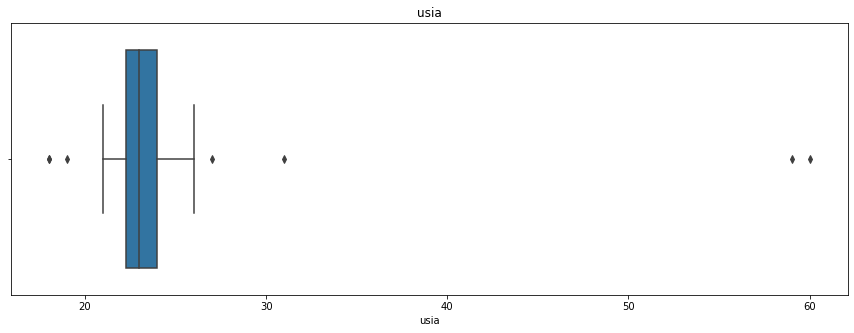

In [18]:
case = 'usia'

plt.figure(figsize=(15,5))

sb.boxplot(x=df_analisis[case])

plt.title(case)

plt.show()

jumlah responden 	: 34
total respon 		: 100.0%


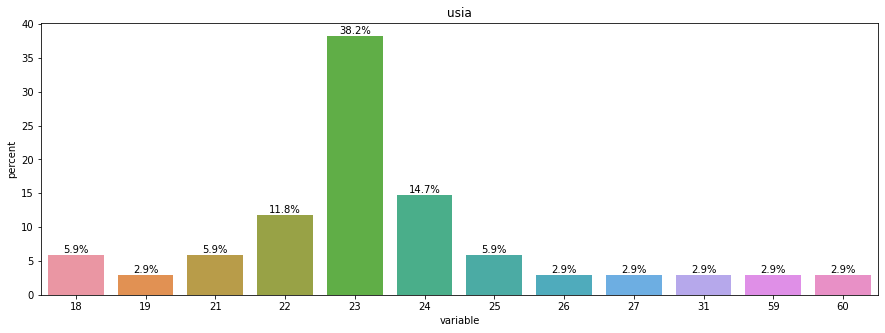

In [19]:
case = 'usia'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

### pekerjaan

jumlah responden 	: 34
total respon 		: 100.0%


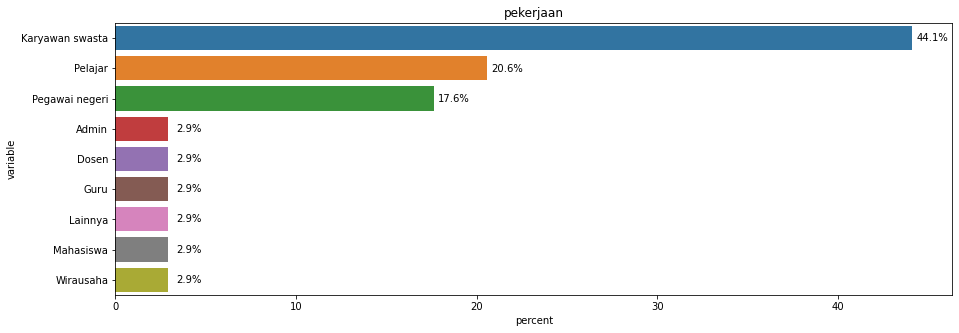

In [20]:
case = 'pekerjaan'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)
tabel_pertanyaan = tabel_pertanyaan.sort_values(by='percent', ascending=False)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(y=tabel_pertanyaan['variable'], x=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='h', percent=True)

### domisili

jumlah responden 	: 34
total respon 		: 100.0%


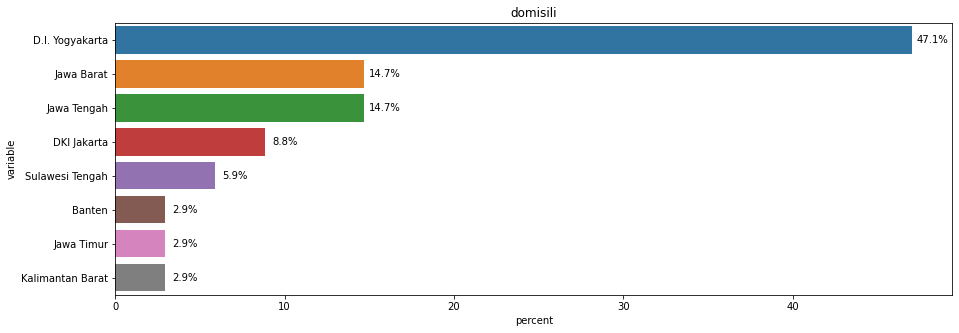

In [21]:
case = 'domisili'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)
tabel_pertanyaan = tabel_pertanyaan.sort_values(by='percent', ascending=False)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(y=tabel_pertanyaan['variable'], x=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='h', percent=True)

## os

In [22]:
kol_resp = df_analisis.columns[:4].to_list()
kol_resp

['id', 'usia', 'pekerjaan', 'domisili']

### Sistem Operasi komputer mana saja yang Anda pernah dengar / ketahui?

jumlah responden 	: 34
total multirespon 	: 423.5%


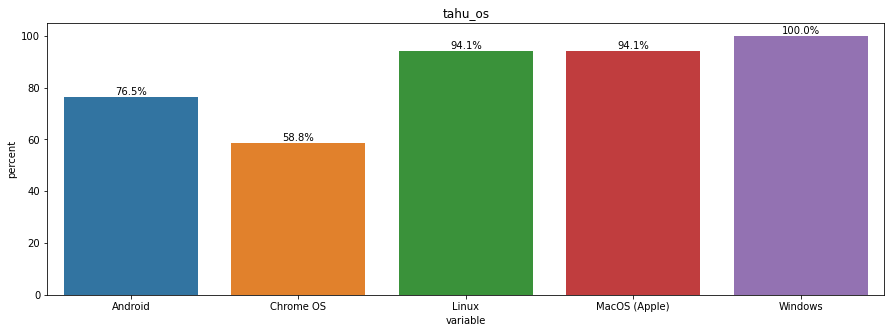

In [23]:
case = 'tahu_os'
tabel_pertanyaan, n_responden = os_multirespon(df_analisis, case, kol_resp)

print("jumlah responden \t:", n_responden)
print("total multirespon \t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

### Sistem Operasi apa saja yang Anda pernah pakai di komputer?

jumlah responden 	: 34
total multirespon 	: 226.5%


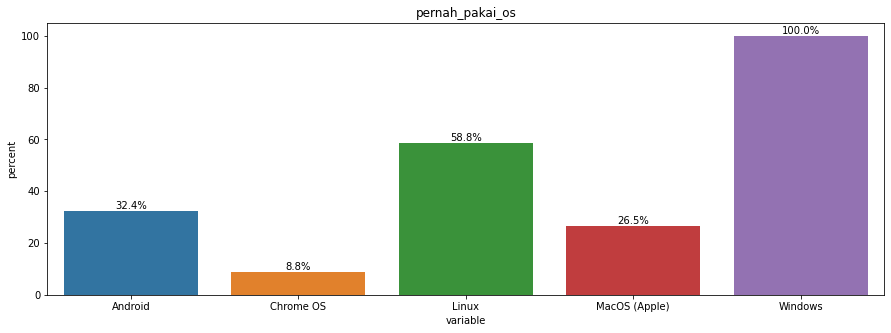

In [24]:
case = 'pernah_pakai_os'
tabel_pertanyaan, n_responden = os_multirespon(df_analisis, case, kol_resp)

print("jumlah responden \t:", n_responden)
print("total multirespon \t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

### Sistem Operasi apa yang Anda pakai saat ini di komputer?

jumlah responden 	: 34
total multirespon 	: 141.2%


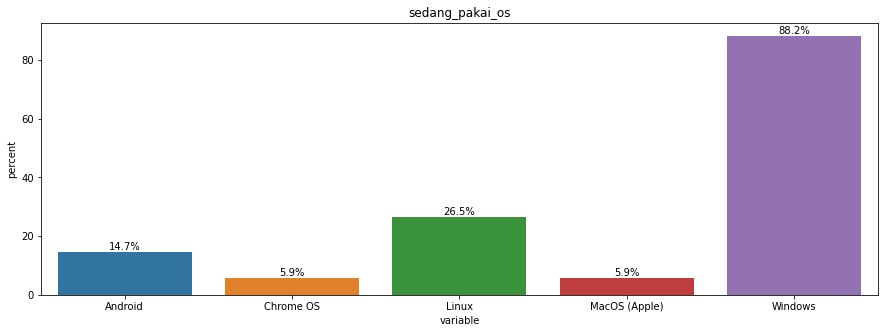

In [25]:
case = 'sedang_pakai_os'
tabel_pertanyaan, n_responden = os_multirespon(df_analisis, case, kol_resp)

print("jumlah responden \t:", n_responden)
print("total multirespon \t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

### Sistem Operasi apa yang ingin Anda pakai sebagai OS utama di komputer?

jumlah responden 	: 34
total respon 		: 100.0%


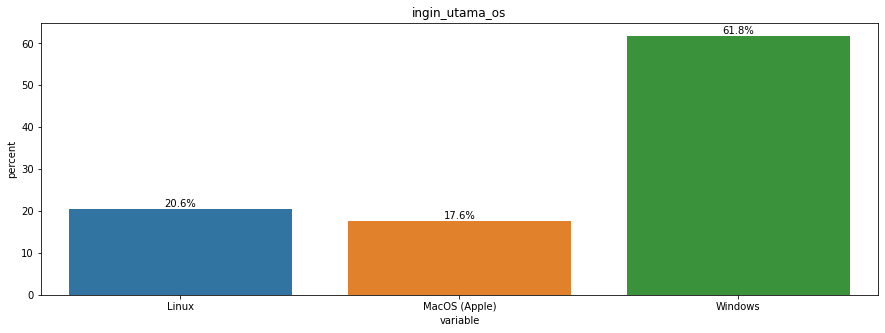

In [26]:
case = 'ingin_utama_os'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

### Menurut Anda, siapa saja yang cocok menggunakan sistem operasi MacOS?

jumlah responden 	: 34
total multirespon 	: 217.6%


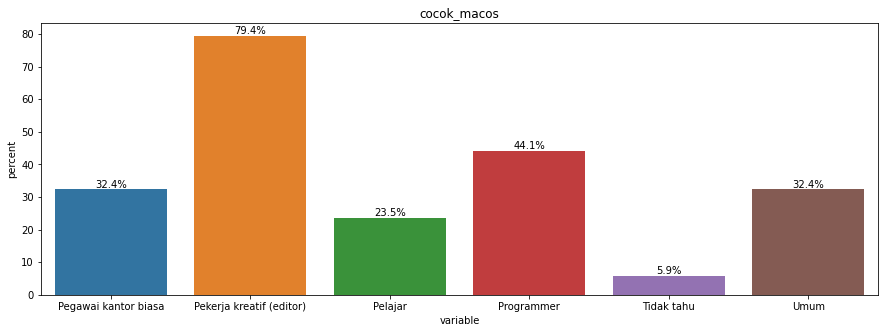

In [27]:
case = 'cocok_macos'
tabel_pertanyaan, n_responden = os_multirespon(df_analisis, case, kol_resp)

print("jumlah responden \t:", n_responden)
print("total multirespon \t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)

plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

### Menurut Anda, siapa saja yang cocok menggunakan sistem operasi Windows?

jumlah responden 	: 34
total multirespon 	: 317.6%


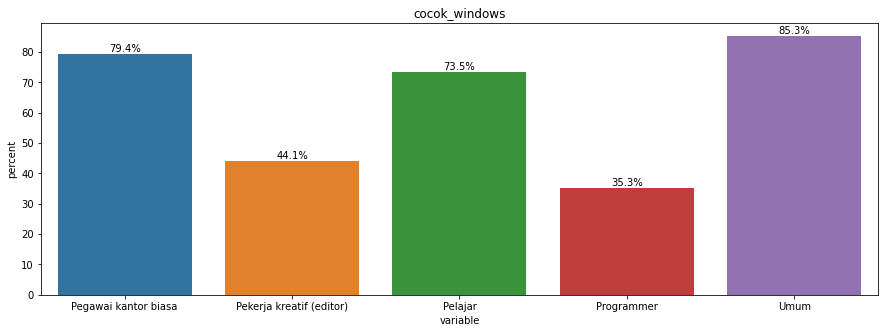

In [28]:
case = 'cocok_windows'
tabel_pertanyaan, n_responden = os_multirespon(df_analisis, case, kol_resp)

print("jumlah responden \t:", n_responden)
print("total multirespon \t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

### Menurut Anda, siapa saja yang cocok menggunakan sistem operasi Linux?

jumlah responden 	: 34
total multirespon 	: 185.3%


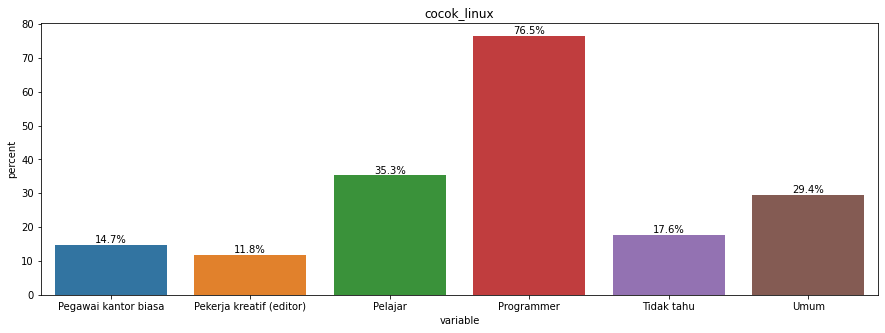

In [29]:
case = 'cocok_linux'
tabel_pertanyaan, n_responden = os_multirespon(df_analisis, case, kol_resp)

print("jumlah responden \t:", n_responden)
print("total multirespon \t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

## linux

### Linux merupakan sistem oprasi yang berkembang dari ranah Open Source. Apakah Anda sebelumnya sudah tahu hal tersebut?

jumlah responden: 34


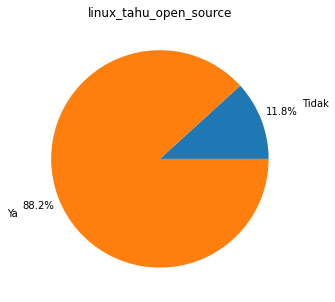

In [30]:
case = 'linux_tahu_open_source'

df_pertanyaan = df_analisis.groupby([case])['id'].count()

print("jumlah responden:", df_analisis.groupby([case])['id'].nunique().sum())

plt.figure(figsize=(15,5))
plt.title(case)

#create pie chart
graph = plt.pie(df_pertanyaan.values, labels = df_pertanyaan.index, autopct='%.1f%%', 
                pctdistance=1.2, labeldistance=1.4)
plt.show()

### Tidak seperti Windows atau MacOS, Linux memiliki berbagai pilihan varian sehingga penguna bisa memilih mana yang sesuai dengan spesifikasi komputernya. Apakah sebelumnya Anda sudah tahu hal tersebut?

jumlah responden: 34


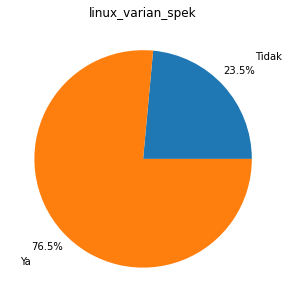

In [31]:
case = 'linux_varian_spek'

df_pertanyaan = df_analisis.groupby([case])['id'].count()
print("jumlah responden:", df_analisis.groupby([case])['id'].nunique().sum())

plt.figure(figsize=(15,5))
plt.title(case)

#create pie chart
graph = plt.pie(df_pertanyaan.values, labels = df_pertanyaan.index, autopct='%.1f%%', 
                pctdistance=1.2, labeldistance=1.4)
plt.show()

### Apakah Anda pernah menggunakan sistem operasi Linux?

jumlah responden 	: 34
total respon 		: 100.0%


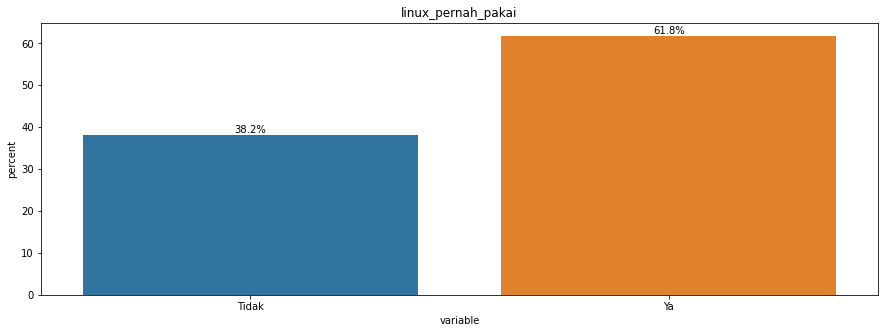

In [32]:
case = 'linux_pernah_pakai'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)

plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

 ### Apakah Anda tertarik untuk mencoba sistem operasi Linux?

jumlah responden 	: 13
total respon 		: 100.0%


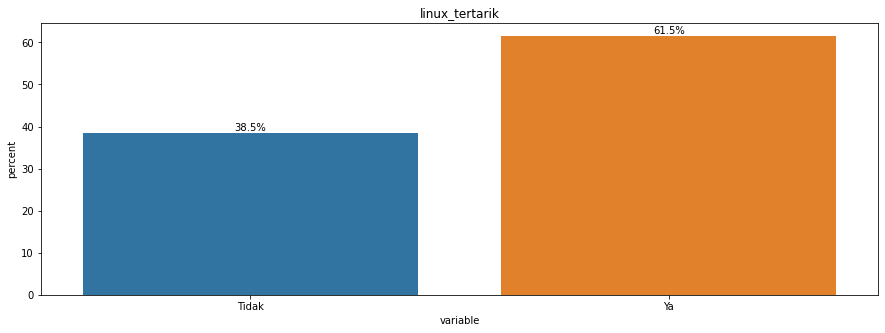

In [33]:
case = 'linux_tertarik'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

In [34]:
percent_type = 'columns'
display(pd.crosstab(index=df_analisis['linux_tertarik'], columns=df_analisis['linux_tahu_open_source'], 
            normalize=percent_type, margins=True, margins_name='Total %').style.format('{:.1%}').background_gradient().set_caption('Percent in %s'%(percent_type)))

print("")

percent_type = 'index'
display(pd.crosstab(index=df_analisis['linux_tertarik'], columns=df_analisis['linux_tahu_open_source'], 
            normalize=percent_type, margins=True, margins_name='Total %').style.format('{:.1%}').background_gradient().set_caption('Percent in %s'%(percent_type)))

print("")

percent_type = 'all'
display(pd.crosstab(index=df_analisis['linux_tertarik'], columns=df_analisis['linux_tahu_open_source'], 
            normalize=percent_type, margins=True, margins_name='Total %').style.format('{:.1%}').background_gradient().set_caption('Percent in %s'%(percent_type)))

linux_tahu_open_source,Tidak,Ya,Total %
linux_tertarik,,,
Tidak,0.0%,50.0%,38.5%
Ya,100.0%,50.0%,61.5%


linux_tahu_open_source,Tidak,Ya
linux_tertarik,,
Tidak,0.0%,100.0%
Ya,37.5%,62.5%
Total %,23.1%,76.9%


linux_tahu_open_source,Tidak,Ya,Total %
linux_tertarik,,,
Tidak,0.0%,38.5%,38.5%
Ya,23.1%,38.5%,61.5%
Total %,23.1%,76.9%,100.0%


In [35]:
percent_type = 'columns'
display(pd.crosstab(index=df_analisis['linux_tertarik'], columns=df_analisis['linux_varian_spek'], 
            normalize=percent_type, margins=True, margins_name='Total %').style.format('{:.1%}').background_gradient().set_caption('Percent in %s'%(percent_type)))

print("")

percent_type = 'index'
display(pd.crosstab(index=df_analisis['linux_tertarik'], columns=df_analisis['linux_varian_spek'], 
            normalize=percent_type, margins=True, margins_name='Total %').style.format('{:.1%}').background_gradient().set_caption('Percent in %s'%(percent_type)))

print("")

percent_type = 'all'
display(pd.crosstab(index=df_analisis['linux_tertarik'], columns=df_analisis['linux_varian_spek'], 
            normalize=percent_type, margins=True, margins_name='Total %').style.format('{:.1%}').background_gradient().set_caption('Percent in %s'%(percent_type)))

linux_varian_spek,Tidak,Ya,Total %
linux_tertarik,,,
Tidak,33.3%,42.9%,38.5%
Ya,66.7%,57.1%,61.5%


linux_varian_spek,Tidak,Ya
linux_tertarik,,
Tidak,40.0%,60.0%
Ya,50.0%,50.0%
Total %,46.2%,53.8%


linux_varian_spek,Tidak,Ya,Total %
linux_tertarik,,,
Tidak,15.4%,23.1%,38.5%
Ya,30.8%,30.8%,61.5%
Total %,46.2%,53.8%,100.0%


### Mengapa Anda memilih jawaban tersebut (jawaban pertanyaan 11) ?

jumlah responden 	: 13
total respon 		: 100.0%


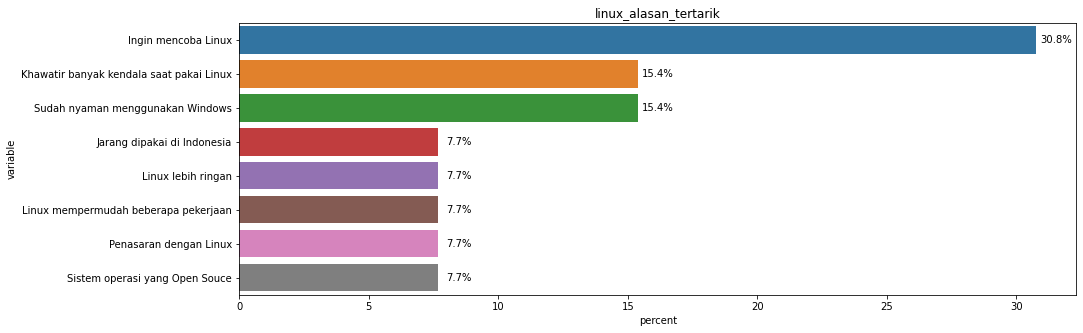

In [36]:
case = 'linux_alasan_tertarik'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)
tabel_pertanyaan = tabel_pertanyaan.sort_values(by='percent', ascending=False)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(y=tabel_pertanyaan['variable'], x=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='h', percent=True)

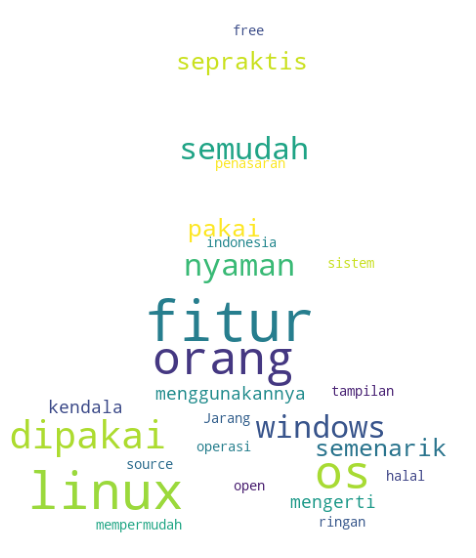

In [37]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian')) 

text = df_analisis[case].dropna().replace(invert_linux_tertarik).values 
text_input = " ".join(text)

wordcloud = WordCloud(stopwords=stop_words, mask=image_mask, background_color='white').generate(text_input)
# wordcloud = WordCloud(stopwords=stop_words, mask=None, background_color='white').generate(text_input)


plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## foss

### Darimanakah Anda tahu istilah Free & Open Source Software (FOSS) pertama kali?

jumlah responden 	: 34
total respon 		: 100.0%


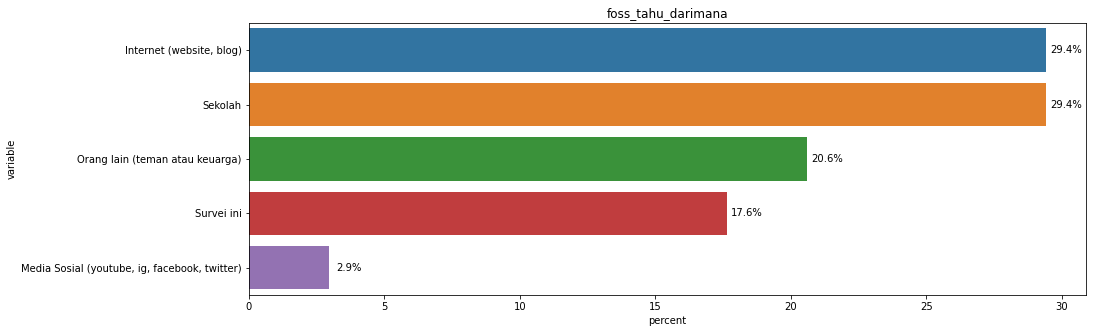

In [38]:
case = 'foss_tahu_darimana'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)
tabel_pertanyaan = tabel_pertanyaan.sort_values(by='percent', ascending=False)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(y=tabel_pertanyaan['variable'], x=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='h', percent=True)

### Menurut Anda, apakah yang dimaksud "Free" pada istilah FOSS?

jumlah responden 	: 34
total respon 		: 100.0%


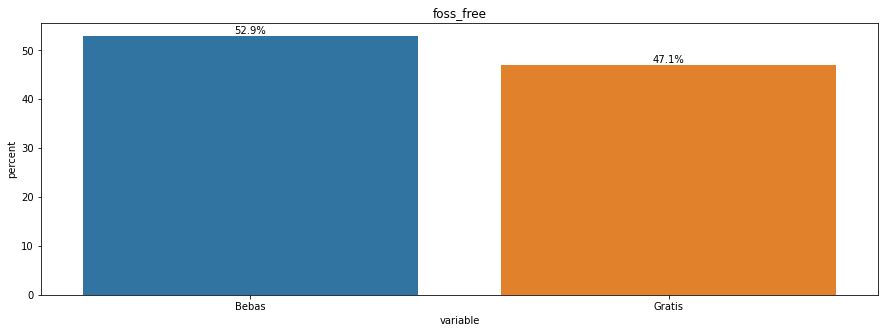

In [39]:
case = 'foss_free'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)
tabel_pertanyaan = tabel_pertanyaan.sort_values(by='percent', ascending=False)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, percent=True)

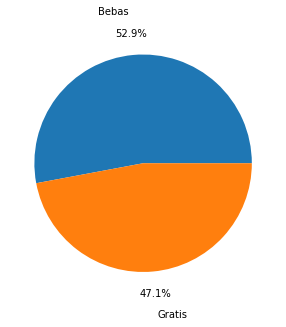

In [40]:
df_pertanyaan = df_analisis.groupby(['foss_free'])['id'].count()

plt.figure(figsize=(15,5))

#create pie chart
graph = plt.pie(df_pertanyaan.values, labels = df_pertanyaan.index, autopct='%.1f%%', 
                pctdistance=1.2, labeldistance=1.4)
plt.show()

### Aplikasi yang masuk dalam kategori FOSS bisa gratis maupun berbayar. Manakah yang Anda prioritaskan untuk dipakai?

jumlah responden 	: 34
total respon 		: 100.0%


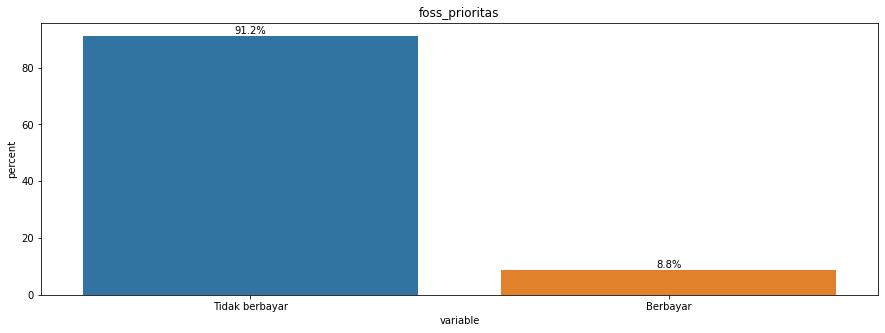

In [41]:
case = 'foss_prioritas'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)
tabel_pertanyaan = tabel_pertanyaan.sort_values(by='percent', ascending=False)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, percent=True)

In [42]:
percent_type = 'columns'
display(pd.crosstab(index=df_analisis['foss_prioritas'], columns=df_analisis['foss_free'], 
            normalize=percent_type, margins=True, margins_name='Total %').style.format('{:.1%}').background_gradient().set_caption('Percent in %s'%(percent_type)))

print("")

percent_type = 'index'
display(pd.crosstab(index=df_analisis['foss_prioritas'], columns=df_analisis['foss_free'], 
            normalize=percent_type, margins=True, margins_name='Total %').style.format('{:.1%}').background_gradient().set_caption('Percent in %s'%(percent_type)))

print("")

percent_type = 'all'
display(pd.crosstab(index=df_analisis['foss_prioritas'], columns=df_analisis['foss_free'], 
            normalize=percent_type, margins=True, margins_name='Total %').style.format('{:.1%}').background_gradient().set_caption('Percent in %s'%(percent_type)))

foss_free,Bebas,Gratis,Total %
foss_prioritas,,,
Berbayar,11.1%,6.2%,8.8%
Tidak berbayar,88.9%,93.8%,91.2%


foss_free,Bebas,Gratis
foss_prioritas,,
Berbayar,66.7%,33.3%
Tidak berbayar,51.6%,48.4%
Total %,52.9%,47.1%


foss_free,Bebas,Gratis,Total %
foss_prioritas,,,
Berbayar,5.9%,2.9%,8.8%
Tidak berbayar,47.1%,44.1%,91.2%
Total %,52.9%,47.1%,100.0%


### Apa alasan Anda memilih jawaban tersebut?

jumlah responden 	: 34
total respon 		: 100.0%


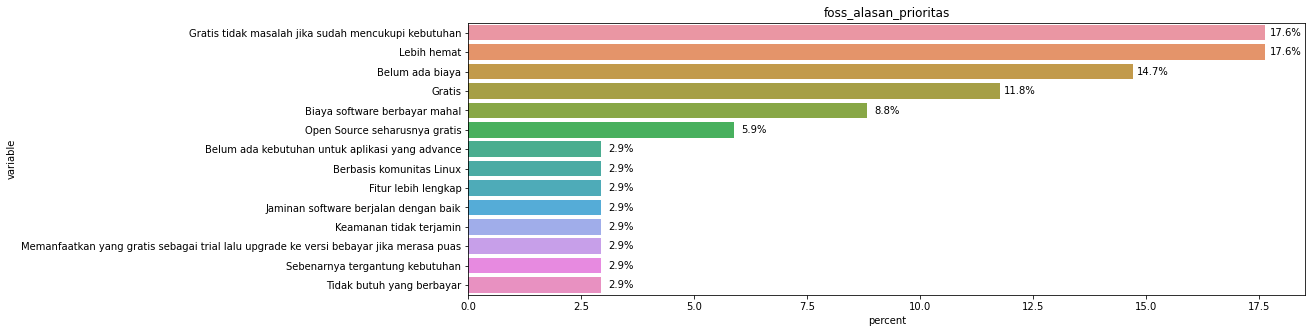

In [43]:
case = 'foss_alasan_prioritas'

tabel_pertanyaan, n_responden = os_singlerespon(df_analisis, case)
tabel_pertanyaan = tabel_pertanyaan.sort_values(by='percent', ascending=False)

print("jumlah responden \t:", n_responden)
print("total respon \t\t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(y=tabel_pertanyaan['variable'], x=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='h', percent=True)

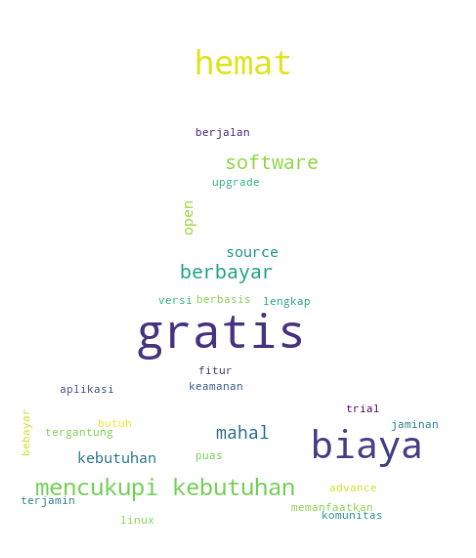

In [44]:
stop_words = set(stopwords.words('indonesian')) 

text = df_analisis[case].str.lower().dropna().values 
text_input = " ".join(text)

wordcloud = WordCloud(stopwords=stop_words, mask=image_mask, background_color='white').generate(text_input)
# wordcloud = WordCloud(stopwords=stop_words, mask=None, background_color='white').generate(text_input)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

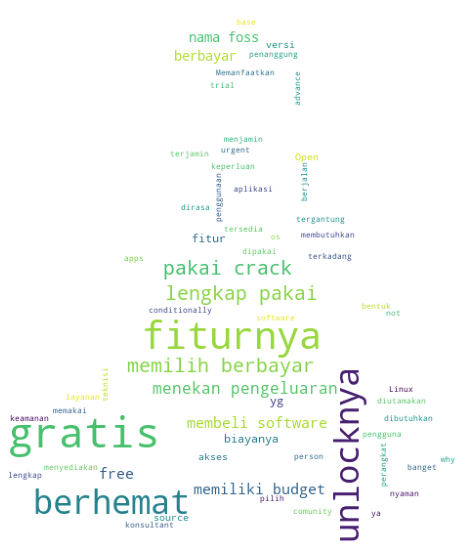

In [45]:
text = df_analisis[case].dropna().replace(invert_foss_prioritas).values 
text_input = " ".join(text)

wordcloud = WordCloud(stopwords=stop_words, mask=image_mask, background_color='white').generate(text_input)
# wordcloud = WordCloud(stopwords=stop_words, mask=None, background_color='white').generate(text_input)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Menggunakan aplikasi berlabel Free & Open Source Software lebih aman dari virus dibandingkan aplikasi bajakan

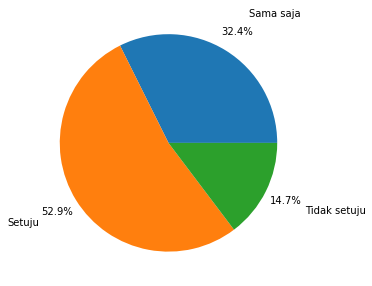

In [46]:
df_pertanyaan = df_analisis.groupby(['foss_aman_virus'])['id'].count()

plt.figure(figsize=(15,5))

#create pie chart
graph = plt.pie(df_pertanyaan.values, labels = df_pertanyaan.index, autopct='%.1f%%', 
                pctdistance=1.2, labeldistance=1.4)
plt.show()

### Aplikasi berlabel Free & Open Source Software kurang populer dibandingkan aplikasi lainnya (semi berbayar, berbayar)

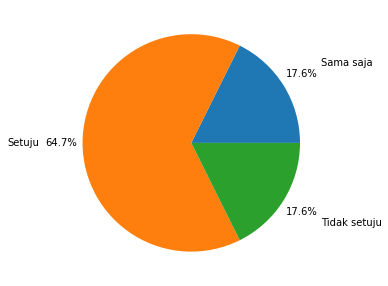

In [47]:
df_pertanyaan = df_analisis.groupby(['foss_kurang_pop'])['id'].count()

plt.figure(figsize=(15,5))

#create pie chart
graph = plt.pie(df_pertanyaan.values, labels = df_pertanyaan.index, autopct='%.1f%%', 
                pctdistance=1.2, labeldistance=1.4)
plt.show()

### Kebanyakan aplikasi berlabel Free & Open Source Software memiliki fitur yang kurang lengkap dibandingkan dengan aplikasi semi berbayar atau berbayar yang sejenis (memiliki fungsi yang sama)

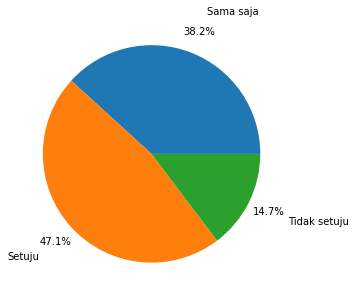

In [48]:
df_pertanyaan = df_analisis.groupby(['foss_fitur_kurang'])['id'].count()

plt.figure(figsize=(15,5))

#create pie chart
graph = plt.pie(df_pertanyaan.values, labels = df_pertanyaan.index, autopct='%.1f%%', 
                pctdistance=1.2, labeldistance=1.4)
plt.show()

### Dari software Office berikut, mana saja yang pernah Anda gunakan di perangkat komputer? (lewati pertanyaan jika tidak pernah memakai Office)

jumlah responden 	: 34
total multirespon 	: 317.6%


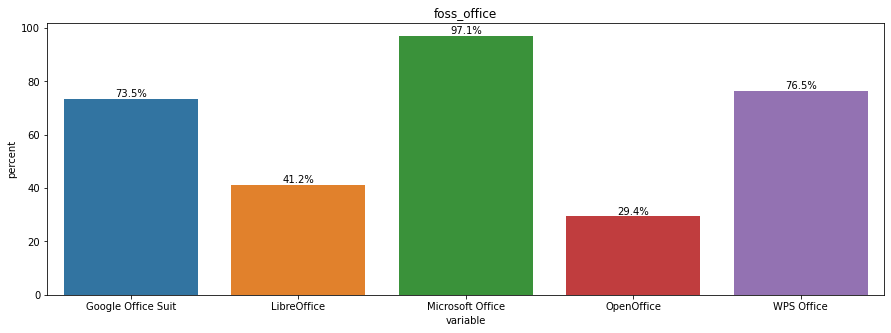

In [49]:
case = 'foss_office'
tabel_pertanyaan, n_responden = os_multirespon(df_analisis, case, kol_resp)

print("jumlah responden \t:", n_responden)
print("total multirespon \t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,5))
graph = sb.barplot(x=tabel_pertanyaan['variable'], y=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='v', percent=True)

### Dari software Video Editor berikut, mana saja yang pernah Anda gunakan di perangkat komputer? (lewati pertanyaan jika tidak pernah memakai Video Editor)

jumlah responden 	: 28
total multirespon 	: 185.7%


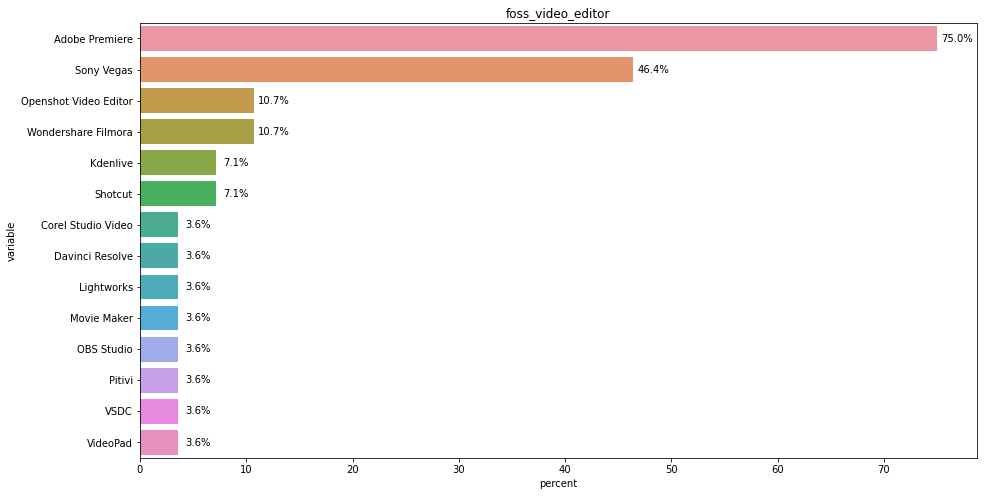

In [50]:
case = 'foss_video_editor'
tabel_pertanyaan, n_responden = os_multirespon(df_analisis, case, kol_resp)
tabel_pertanyaan = tabel_pertanyaan.sort_values(by='percent', ascending=False)

print("jumlah responden \t:", n_responden)
print("total multirespon \t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,8))
graph = sb.barplot(y=tabel_pertanyaan['variable'], x=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='h', percent=True)

### Dari software Graphics Editor berikut, mana saja yang pernah Anda gunakan di perangkat komputer? (lewati pertanyaan jika tidak pernah memakai Graphics Editor)

jumlah responden 	: 34
total multirespon 	: 320.6%


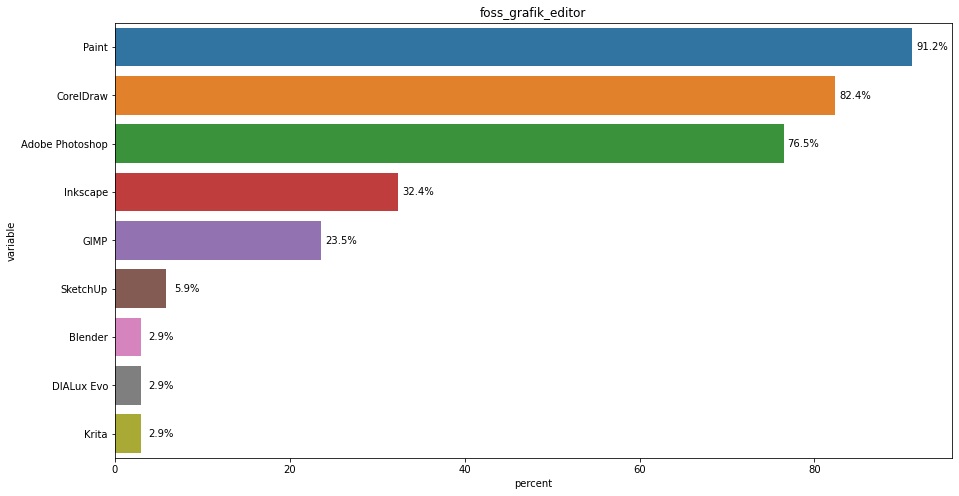

In [51]:
case = 'foss_grafik_editor'
tabel_pertanyaan, n_responden = os_multirespon(df_analisis, case, kol_resp)
tabel_pertanyaan = tabel_pertanyaan.sort_values(by='percent', ascending=False)

print("jumlah responden \t:", n_responden)
print("total multirespon \t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,8))
graph = sb.barplot(y=tabel_pertanyaan['variable'], x=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='h', percent=True)

### Aplikasi FOSS lain apa saja yang pernah Anda pakai? (lewati pertanyaan jika tidak ada)

jumlah responden 	: 15
total multirespon 	: 253.3%


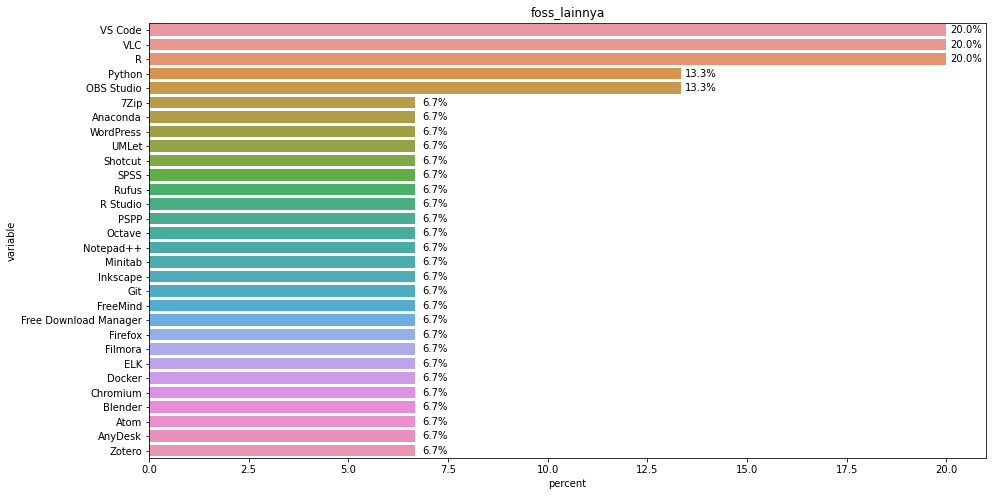

In [52]:
case = 'foss_lainnya'
tabel_pertanyaan, n_responden = os_multirespon(df_analisis, case, kol_resp)
tabel_pertanyaan = tabel_pertanyaan.sort_values(by='percent', ascending=False)

print("jumlah responden \t:", n_responden)
print("total multirespon \t: %.1f%%"%(tabel_pertanyaan['percent'].sum()))
# display(tabel_pertanyaan)


plt.figure(figsize=(15,8))
graph = sb.barplot(y=tabel_pertanyaan['variable'], x=tabel_pertanyaan['percent'])

plt.title(case)

graph_annotate(graph, decimal=1, orientation='h', percent=True)

### "Saya tertarik untuk mencoba dan mengeksplor lebih lanjut tentang FOSS"

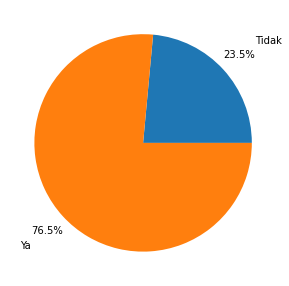

In [53]:
df_pertanyaan = df_analisis.groupby(['foss_tertarik'])['id'].count()

plt.figure(figsize=(15,5))

#create pie chart
graph = plt.pie(df_pertanyaan.values, labels = df_pertanyaan.index, autopct='%.1f%%', 
                pctdistance=1.2, labeldistance=1.4)
plt.show()